In [17]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Library import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [19]:
# Load the dataset forestfires.csv from google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/data-drift/data/uci_forestfires_preprocessed.csv')

# Display the first 5 rows of the dataframe
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [20]:
# Load preprocessed dataset from UCI
df1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

#Display the first 5 rows of the dataframe1
print(df1.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [21]:
# Combine df and df1 data frames

# Check the column names of both dataframes
print("Columns in df:", df.columns)
print("Columns in df1:", df1.columns)

# Check the shapes of the dataframes
print("Shape of df:", df.shape)
print("Shape of df1:", df1.shape)

# Combine dataframes using concat.
# We'll concatenate them row-wise.
# Use axis=0 for concatenation along rows.
combined_df = pd.concat([df, df1], ignore_index=True)

# Display the head of the combined dataframe to see the result
print("Combined dataframe head:")
print(combined_df.head())

# Display the tail of the combined dataframe to see the result
print("Combined dataframe tail:")
print(combined_df.tail())

# Display the shape of the combined dataframe
print("Shape of combined_df:", combined_df.shape)

Columns in df: Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
Columns in df1: Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
Shape of df: (517, 13)
Shape of df1: (517, 13)
Combined dataframe head:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Combined dataframe tail:
      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
1029  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
1030  2  4   aug  sun  81.6   56.7

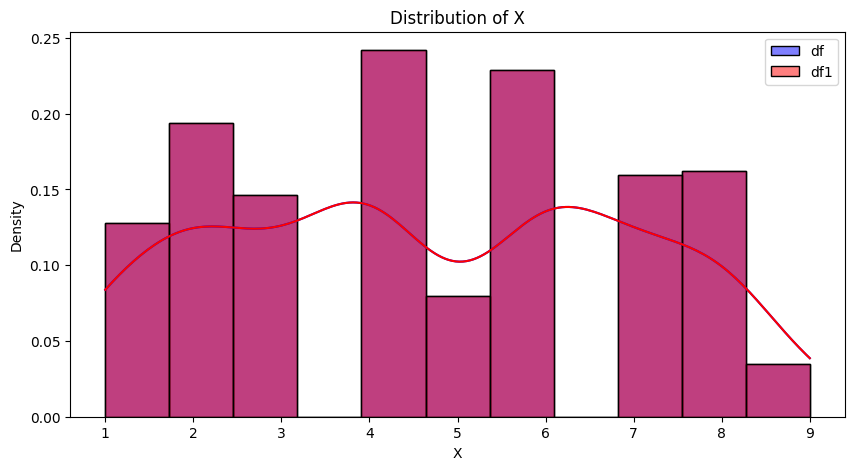

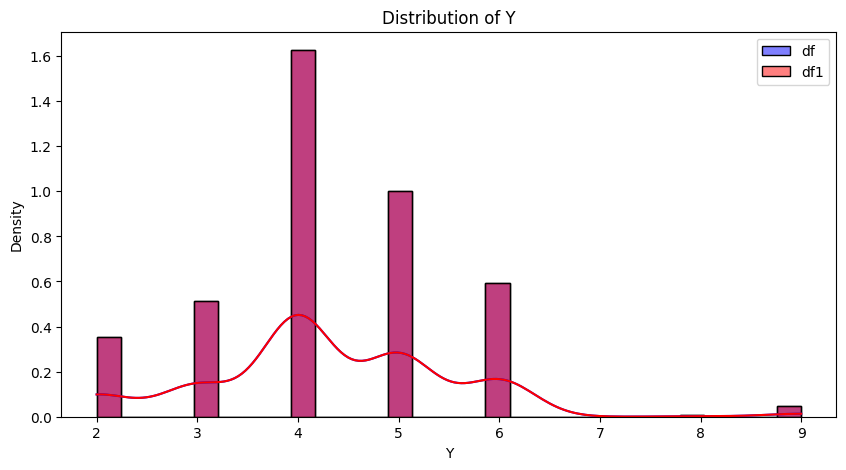

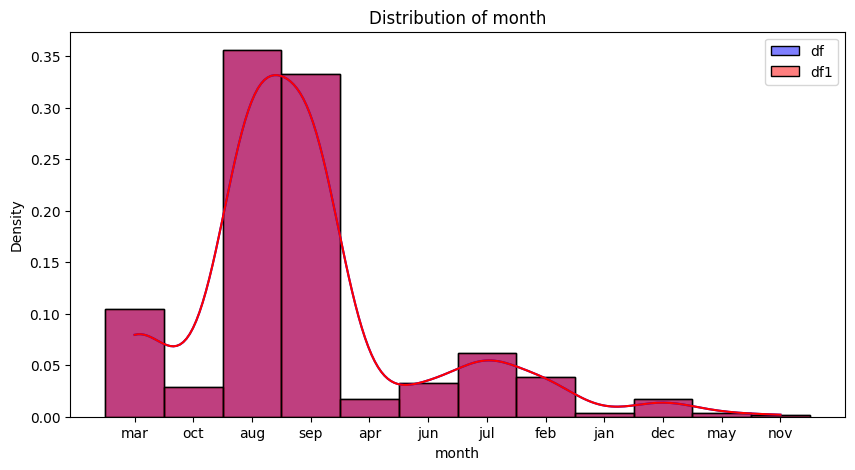

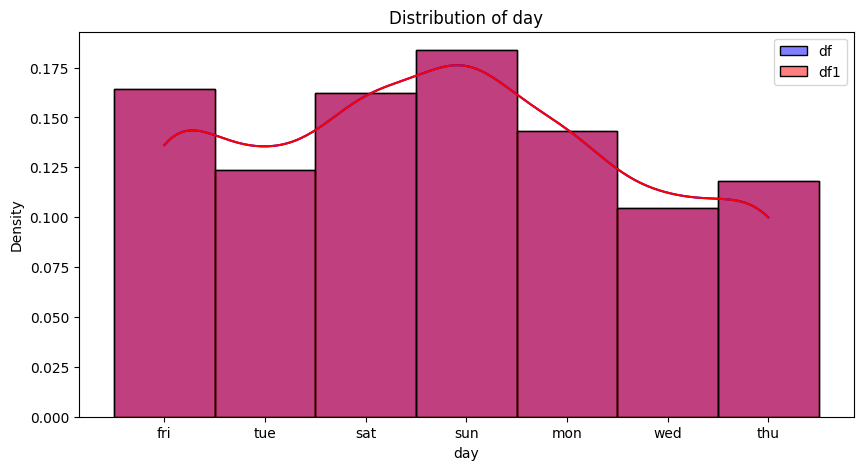

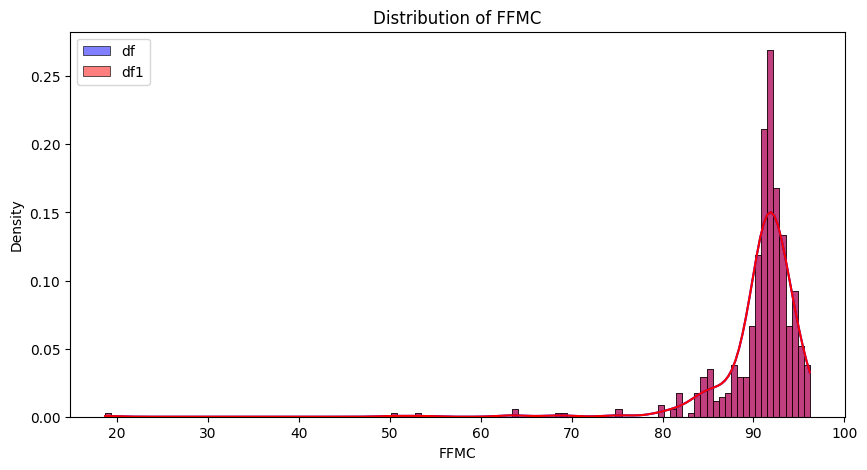

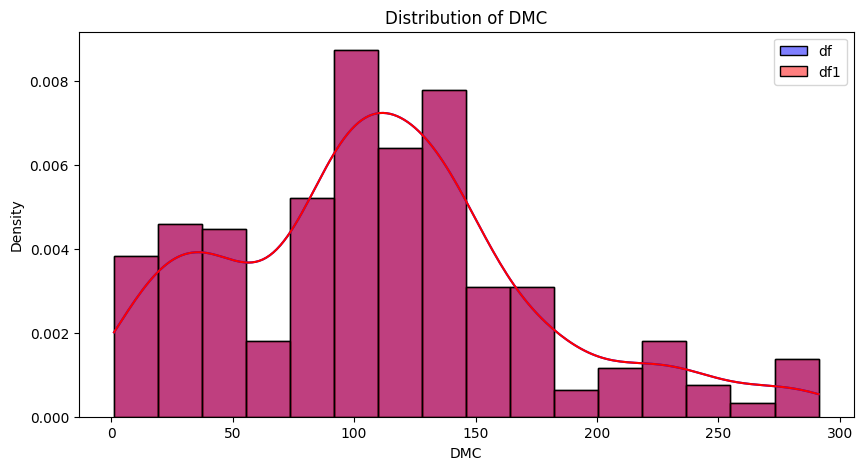

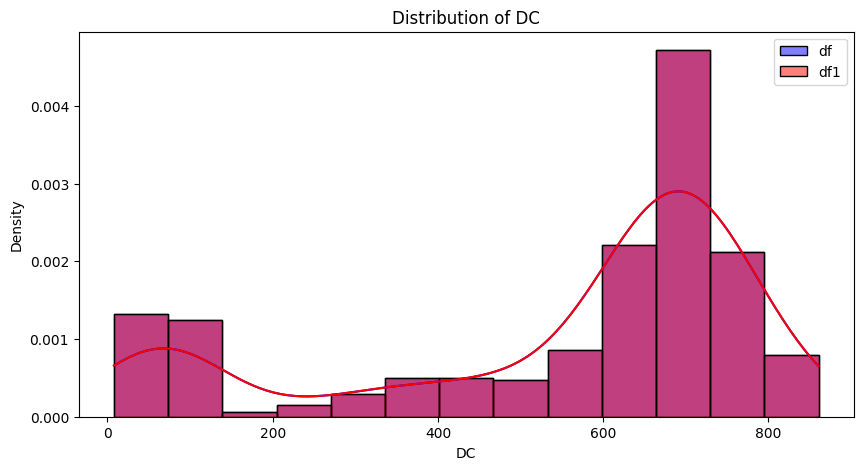

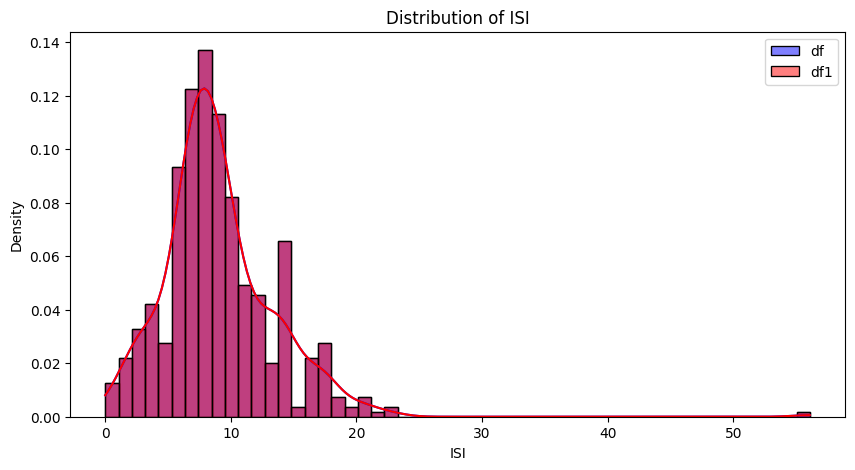

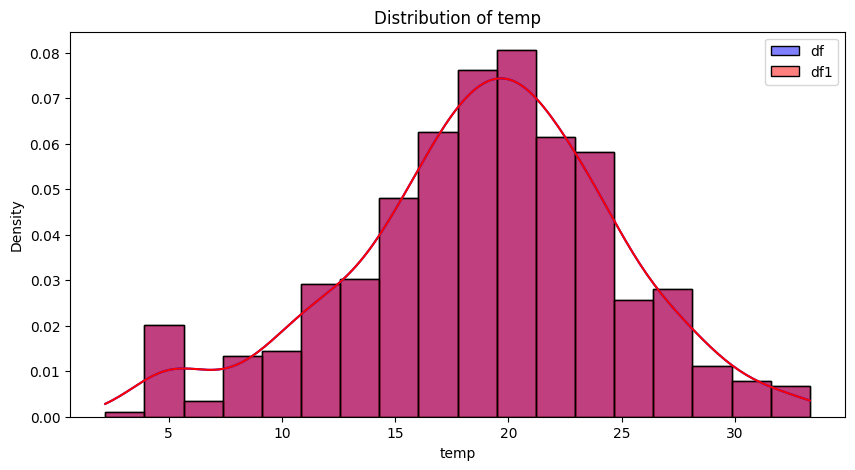

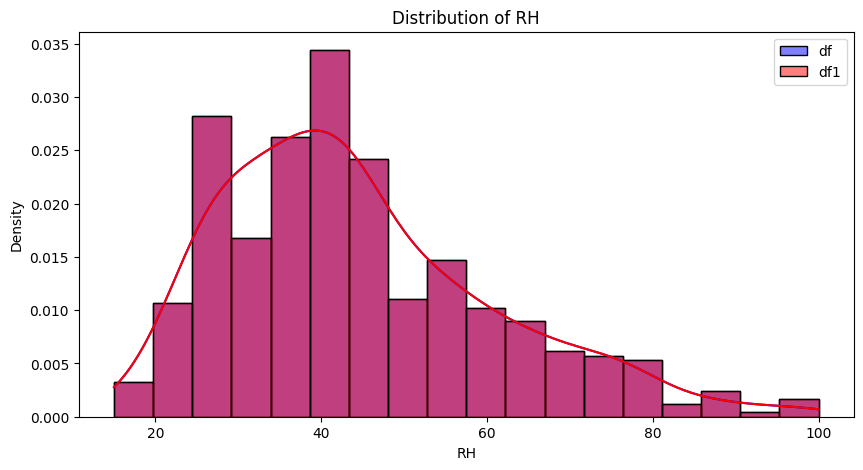

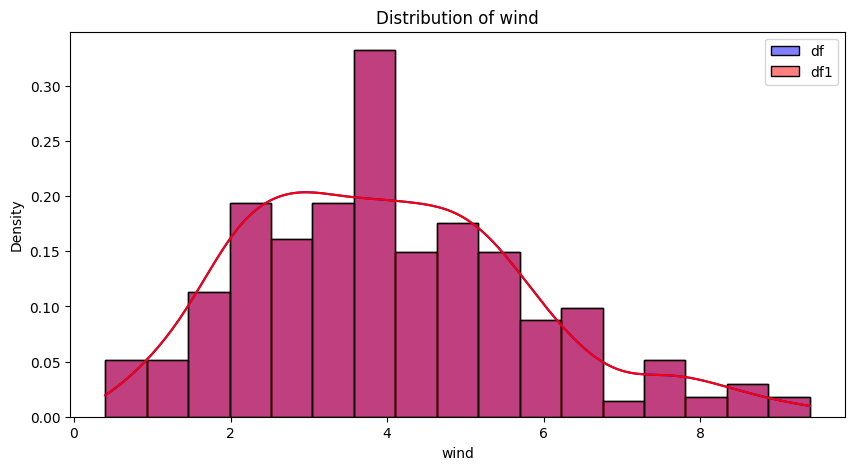

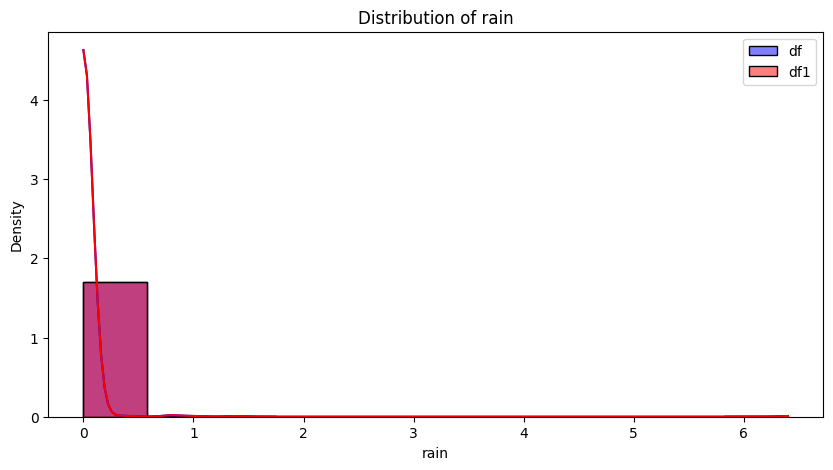

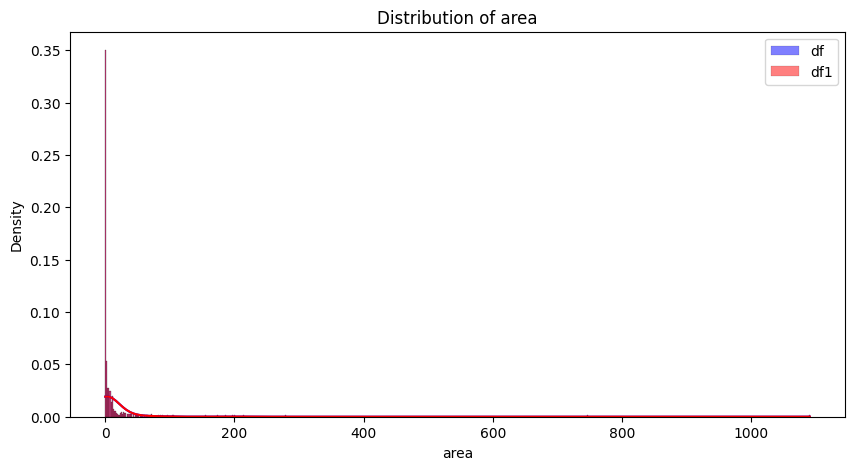

In [22]:
# Plot the distributions of df and df1

# Select a few numeric columns for plotting
numeric_cols = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Plot distributions for selected numeric columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='blue', label='df', stat='density', common_norm=False)
    sns.histplot(df1[col], kde=True, color='red', label='df1', stat='density', common_norm=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# For categorical columns, we can plot counts
categorical_cols = ['month', 'day'] # Assuming month and day are treated as categorical in original df1 but numeric in df

You might need to convert numeric month/day in df to categorical representation if you want to compare counts directly with df1

Or you can just compare the value distributions as done above with histplot.

Let's stick to the numeric distribution plots for consistency with the above code for now.

If you specifically need categorical plots, you would need to handle the data types.

In [23]:
# Perform the KS Test for df and df1

# Select a few numeric columns for KS test
numeric_cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Perform KS test for selected numeric columns
print("\nKolmogorov-Smirnov Test Results:")
for col in numeric_cols:
    ks_statistic, p_value = ks_2samp(df[col], df1[col])
    print(f"Column: {col}")
    print(f"  KS Statistic: {ks_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")
    # Interpret the result (common alpha is 0.05)
    alpha = 0.05
    if p_value < alpha:
        print(f"  The two distributions for {col} are significantly different.")
    else:
        print(f"  The two distributions for {col} are not significantly different.")
    print("-" * 20)


Kolmogorov-Smirnov Test Results:
Column: X
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for X are not significantly different.
--------------------
Column: Y
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for Y are not significantly different.
--------------------
Column: FFMC
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for FFMC are not significantly different.
--------------------
Column: DMC
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for DMC are not significantly different.
--------------------
Column: DC
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for DC are not significantly different.
--------------------
Column: ISI
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for ISI are not significantly different.
--------------------
Column: temp
  KS Statistic: 0.0000
  P-value: 1.0000
  The two distributions for temp are not significantly different.
--------------------